# EDA y procesamiento inicial
- Tipos de características.
- Tratamiento de nulos/valores faltantes.
- Tratamiento de outliers
- Limieza en general.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/stickers/train.csv")
df

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [16]:
# quitamos el id
df.drop(columns=["id"], inplace=True)

In [17]:
df.describe()

,num_sold
count,221259.000000
mean,752.527382
std,690.165445
min,5.000000
25%,219.000000
50%,605.000000
75%,1114.000000
max,5939.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      230130 non-null  object 
 1   country   230130 non-null  object 
 2   store     230130 non-null  object 
 3   product   230130 non-null  object 
 4   num_sold  221259 non-null  float64
dtypes: float64(1), object(4)
memory usage: 8.8+ MB


In [19]:
df["date"] = pd.to_datetime(df["date"])
df

,date,country,store,product,num_sold
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...
230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [20]:
df["country"].value_counts()

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

In [21]:
df["product"].value_counts()

product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64

In [22]:
df["store"].value_counts()

store
Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: count, dtype: int64

In [23]:
# PORCENTAJE DE VALORES NULOS
df.isna().sum()/len(df)

date        0.000000
country     0.000000
store       0.000000
product     0.000000
num_sold    0.038548
dtype: float64

In [24]:
# Solo hay valores nan en la variable objetivo, se pueden eliminar
# podemos probar a imputar y eliminar y comprobar la performance
df.dropna(inplace=True)

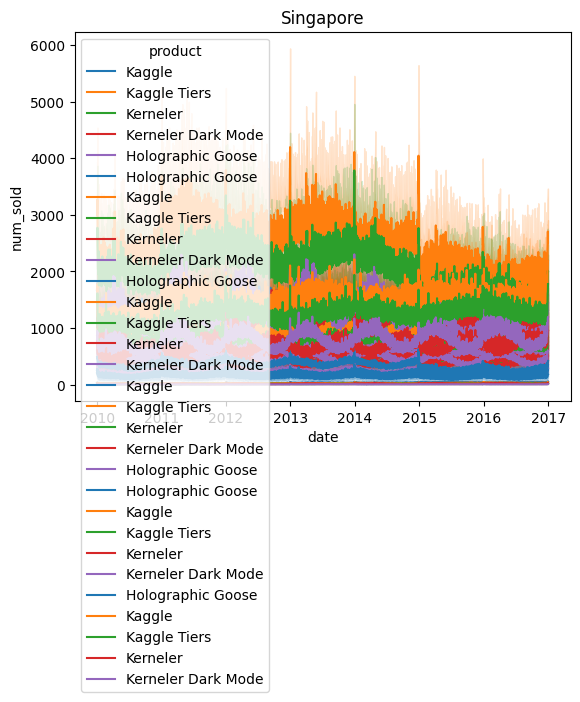

In [25]:
for country in df["country"].unique():
    sns.lineplot(df[df["country"]==country], x="date", y="num_sold", hue="product") # tarda mucho!
    plt.title(country)

KeyboardInterrupt: 

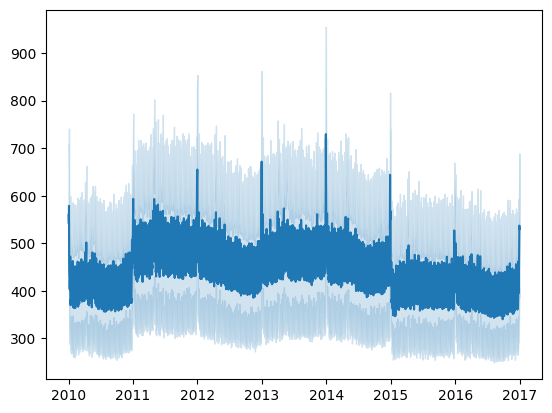

In [26]:
sns.lineplot(df, x="date", y="num_sold", hue="store")

In [ ]:
sns.lineplot(df, x="date", y="num_sold", hue="country")

## Feature engineering

In [ ]:
# crear características basadas en la fecha (vacaciones, fines de semana, etc.)

In [31]:
# crear características: mes y estación
season_map = {
    1: "Winter",
    2: "Spring",
    3: "Summer",
    4: "Autumn"
}

df["month"] = df["date"].dt.month
df["season"] = (df["month"]%12 + 3)//3
df["season"] = df["season"].map(season_map)
df

,date,country,store,product,num_sold,month,season
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,1,Winter
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,1,Winter
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,1,Winter
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,1,Winter
5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,1,Winter
...,...,...,...,...,...,...,...
230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,12,Winter
230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,12,Winter
230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,12,Winter
230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,12,Winter


<Axes: xlabel='season', ylabel='num_sold'>

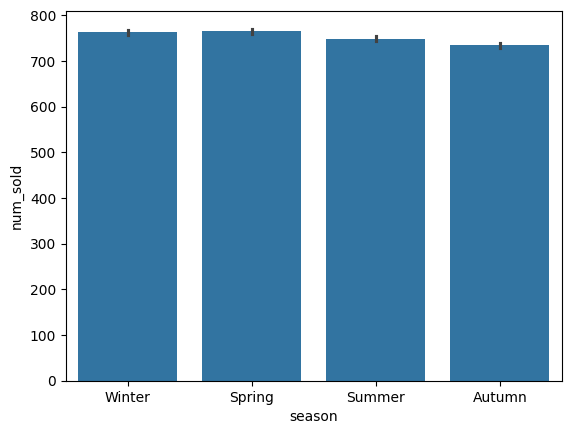

In [32]:
sns.barplot(df, x="season", y="num_sold")

<Axes: xlabel='month', ylabel='num_sold'>

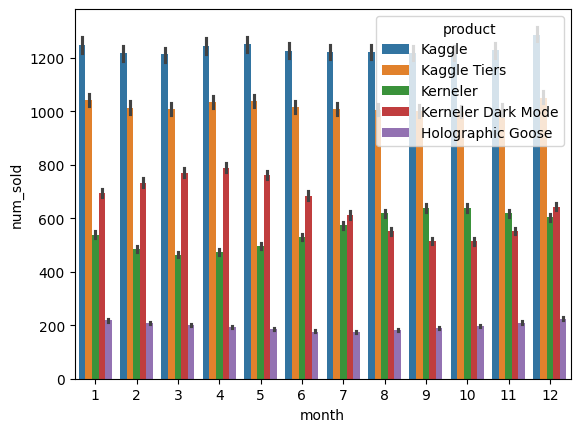

In [34]:
sns.barplot(df, x="month", y="num_sold", hue="product")